In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
df= pd.read_csv("/content/parkinsons_updrs.data")
print(df.head())
print(df.columns)

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

In [ ]:
# check for missing values
print(df.isnull().sum())

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64


In [ ]:
#  check data types
print(df.dtypes)

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object


In [ ]:
# Ensure everything is numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

Separate numeric and categorical columns

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
Categorical columns: []


In [ ]:
# check for outliers
def outlier_detection(dataframe):
    outlier_dict = {}
    for column in dataframe.select_dtypes(include='number').columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)).sum()
        outlier_dict[column] =int(outliers) #typecasting to int for better readability
    return outlier_dict

In [ ]:
# function call
print(outlier_detection(df))

{'subject#': 0, 'age': 101, 'sex': 0, 'test_time': 0, 'motor_UPDRS': 0, 'total_UPDRS': 0, 'Jitter(%)': 398, 'Jitter(Abs)': 366, 'Jitter:RAP': 414, 'Jitter:PPQ5': 425, 'Jitter:DDP': 413, 'Shimmer': 333, 'Shimmer(dB)': 332, 'Shimmer:APQ3': 332, 'Shimmer:APQ5': 314, 'Shimmer:APQ11': 314, 'Shimmer:DDA': 331, 'NHR': 436, 'HNR': 171, 'RPDE': 26, 'DFA': 0, 'PPE': 206}


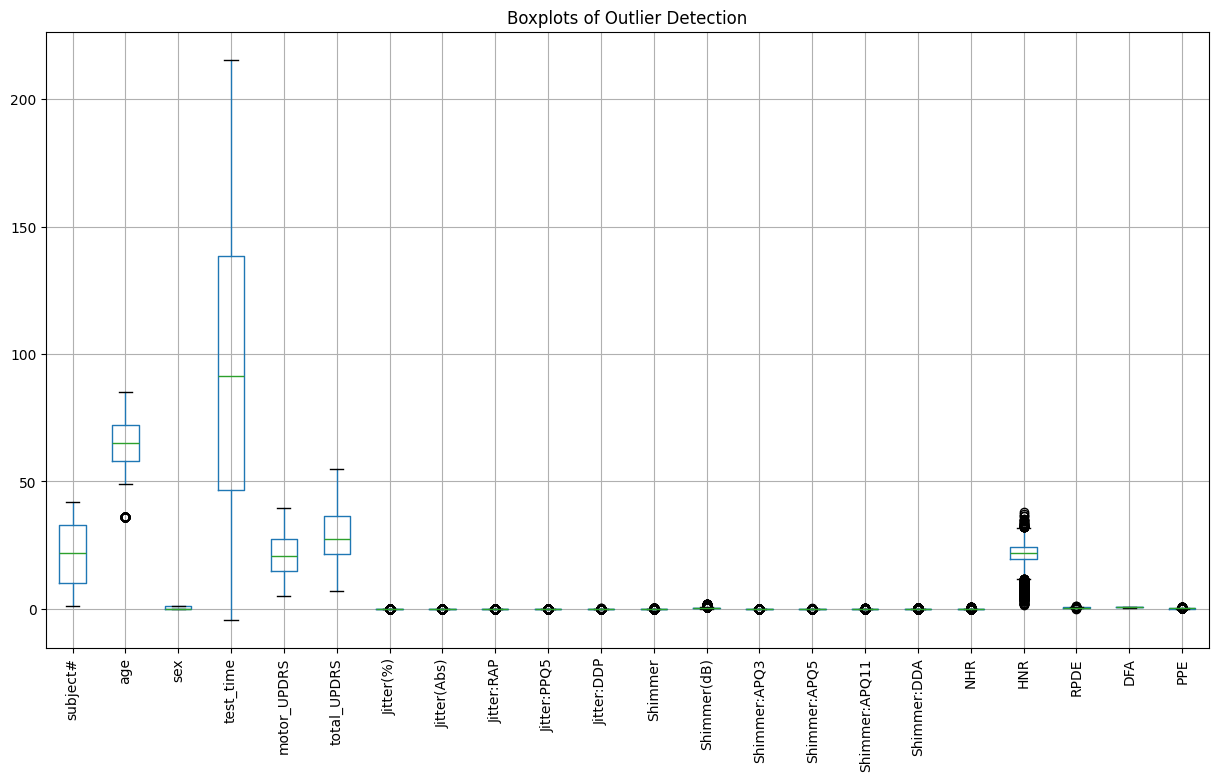

In [ ]:
# visualization of outliers (boxplots)
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots of Outlier Detection")
plt.show()

In [ ]:
# Exploratory Data Analysis (EDA)
# Summary statistics for numeric columns
print(df.describe())

          subject#          age          sex    test_time  motor_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000    58.000000     0.000000    46.847500    15.000000   
50%      22.000000    65.000000     0.000000    91.523000    20.871000   
75%      33.000000    72.000000     1.000000   138.445000    27.596500   
max      42.000000    85.000000     1.000000   215.490000    39.511000   

       total_UPDRS    Jitter(%)  Jitter(Abs)   Jitter:RAP  Jitter:PPQ5  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  ...   
mean     29.018942     0.006154     0.000044     0.002987     0.003277  ...   
std      10.700283     0.005624     0.000036     0.003124     0.003732  ...   
min       7.00000

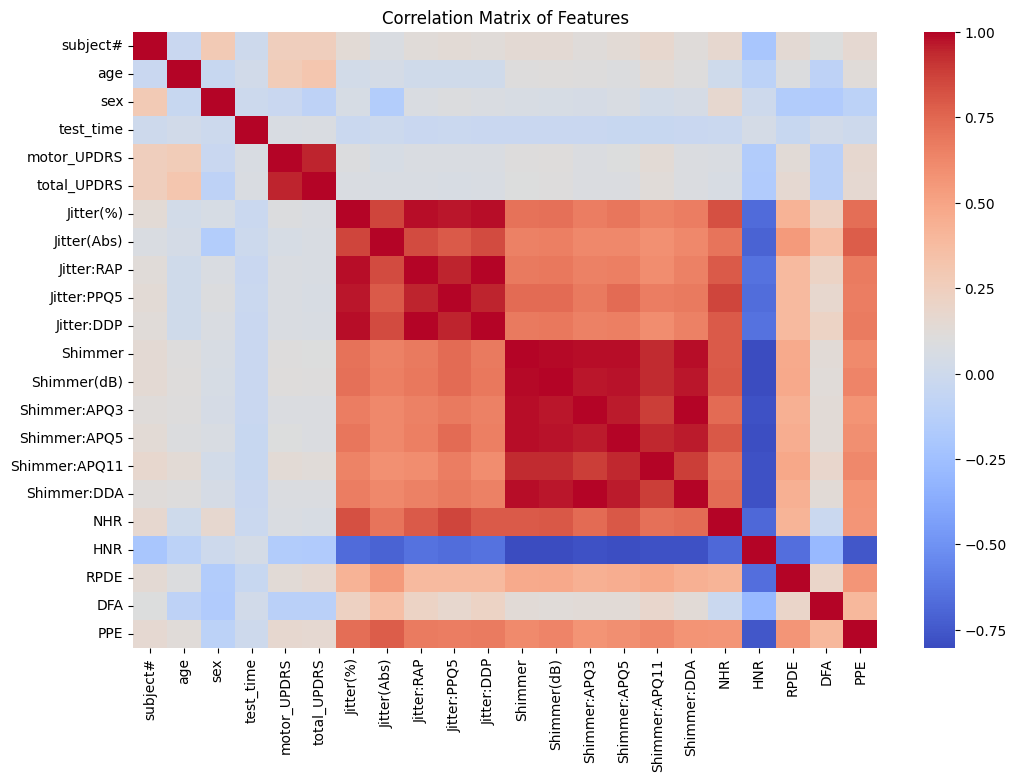

In [ ]:
# correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
# Feature Importance
target = "total_UPDRS"
correlations = df.corr()[target].sort_values(ascending=False)
print(correlations)

total_UPDRS      1.000000
motor_UPDRS      0.947231
age              0.310290
subject#         0.253643
RPDE             0.156897
PPE              0.156195
Shimmer:APQ11    0.120838
Shimmer(dB)      0.098790
Shimmer          0.092141
Shimmer:APQ5     0.083467
Shimmer:DDA      0.079363
Shimmer:APQ3     0.079363
test_time        0.075263
Jitter(%)        0.074247
Jitter(Abs)      0.066927
Jitter:DDP       0.064027
Jitter:RAP       0.064015
Jitter:PPQ5      0.063352
NHR              0.060952
sex             -0.096559
DFA             -0.113475
HNR             -0.162117
Name: total_UPDRS, dtype: float64


In [ ]:
# Top 5 features
top_features = df.corr()["total_UPDRS"].abs().sort_values(ascending=False).head(5).index
print("Top features correlated with total_UPDRS:", top_features)

Top features correlated with total_UPDRS: Index(['total_UPDRS', 'motor_UPDRS', 'age', 'subject#', 'HNR'], dtype='object')


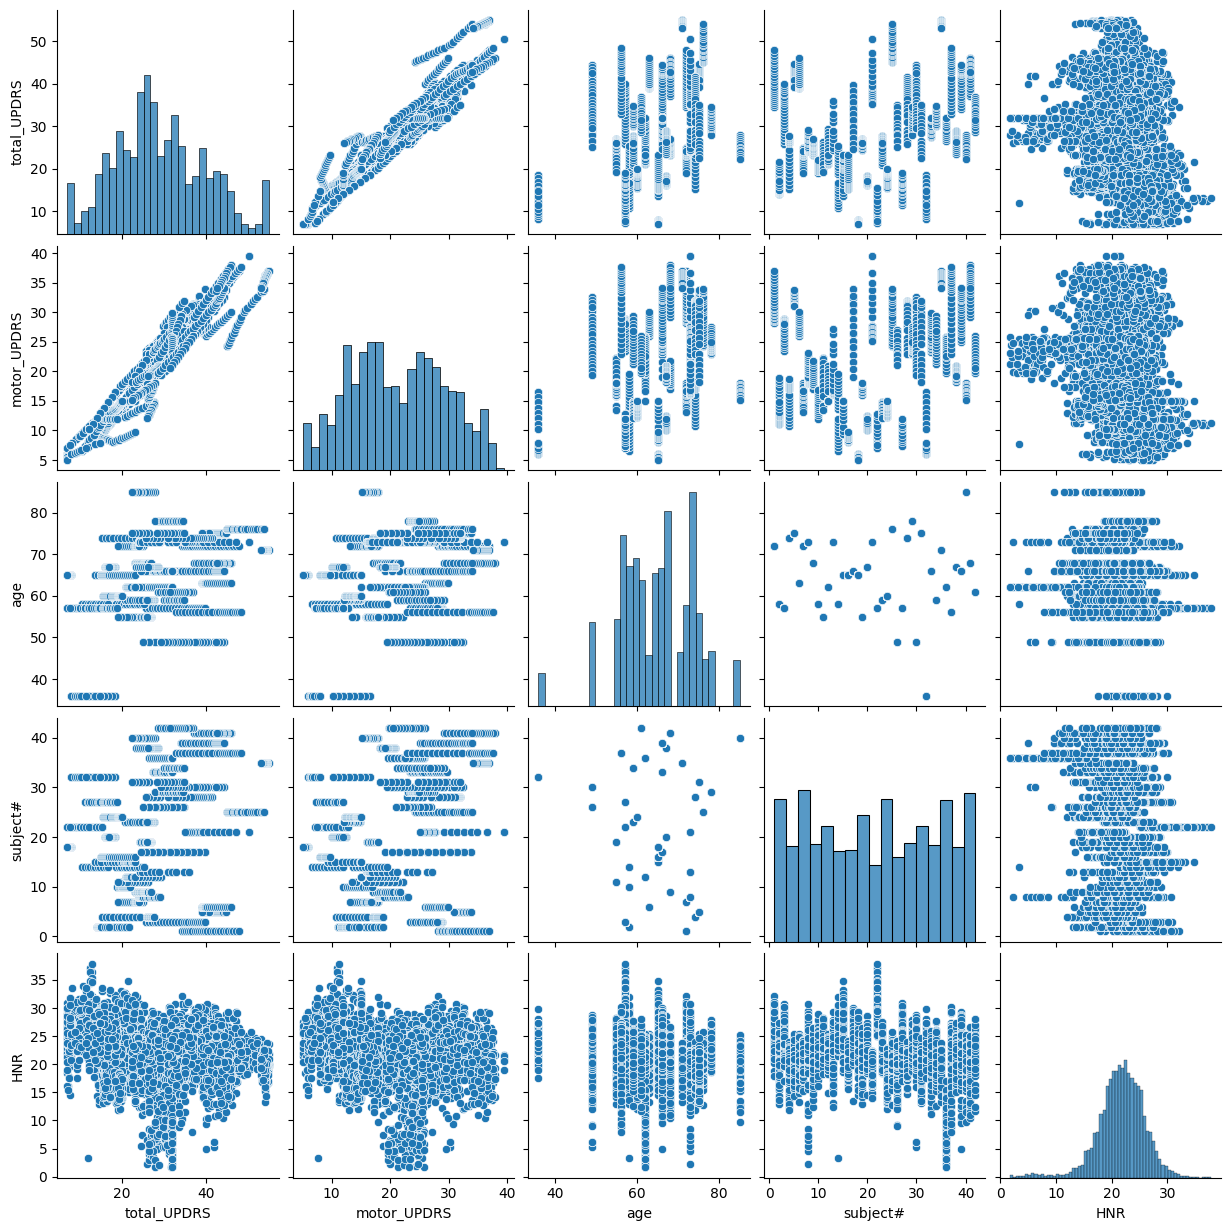

In [ ]:
#  Pairplot of top features
sns.pairplot(df[top_features])
plt.show()

In [ ]:
# Scatter plots for numeric features against target variable
target = "total_UPDRS"

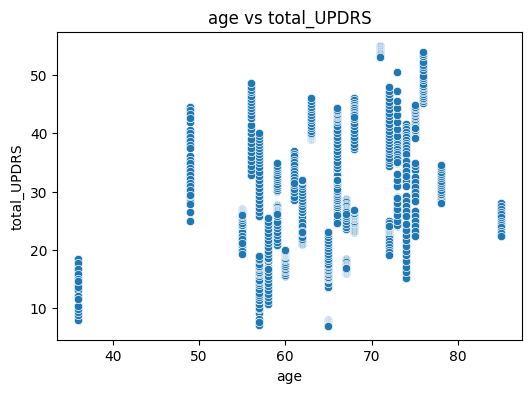

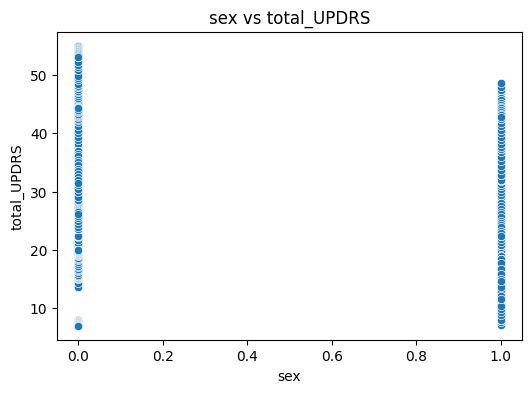

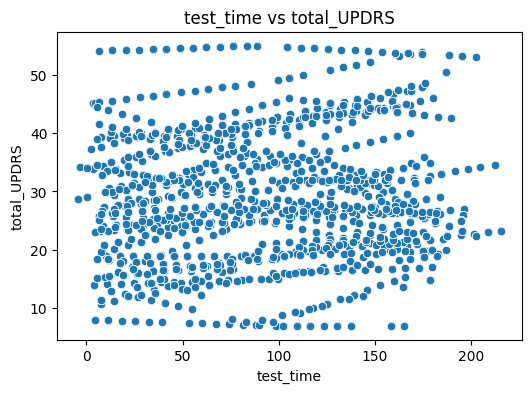

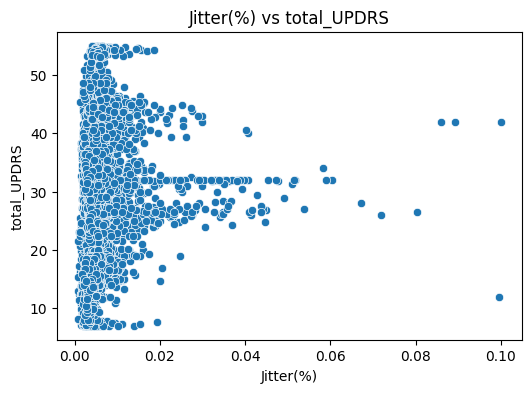

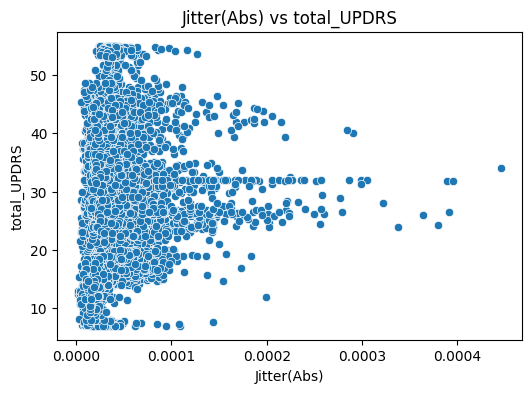

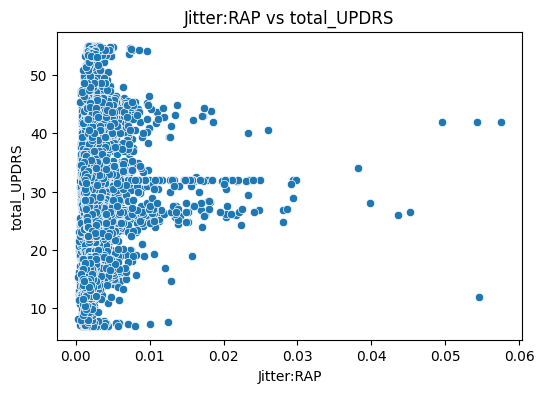

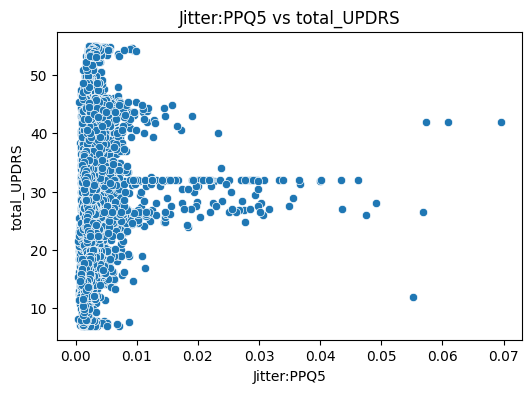

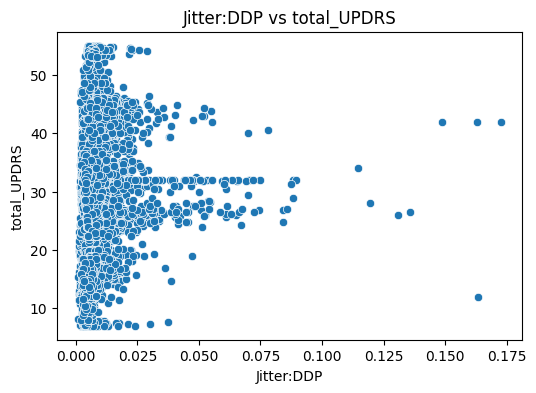

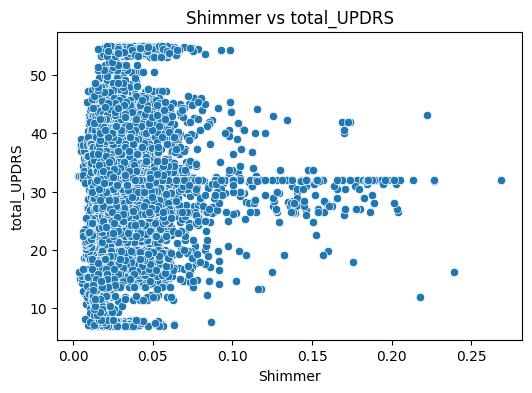

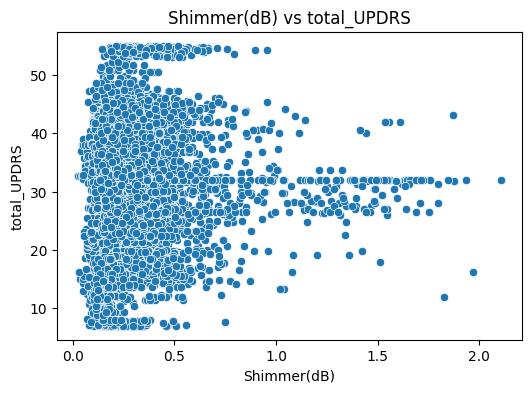

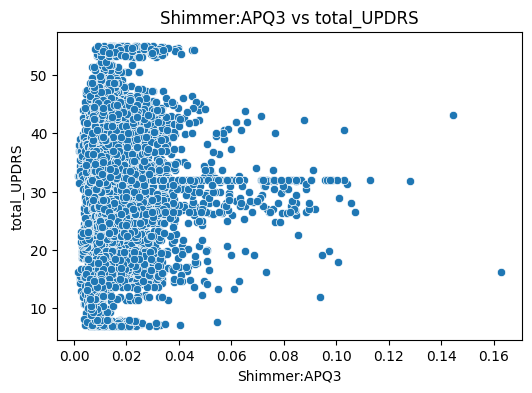

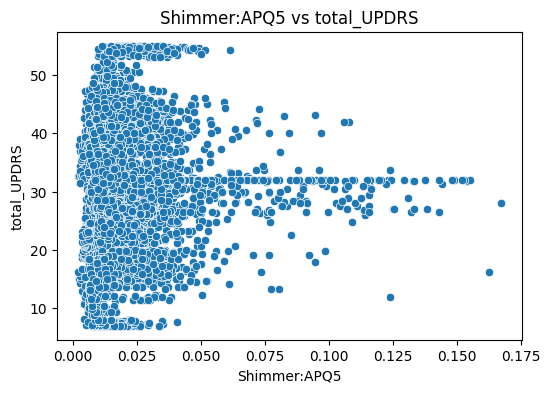

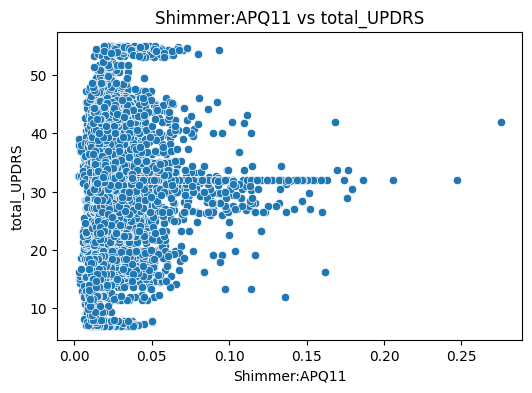

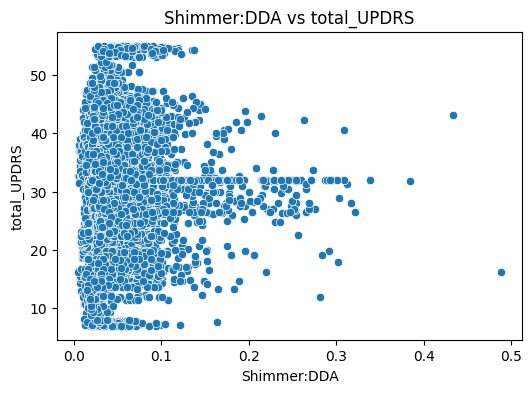

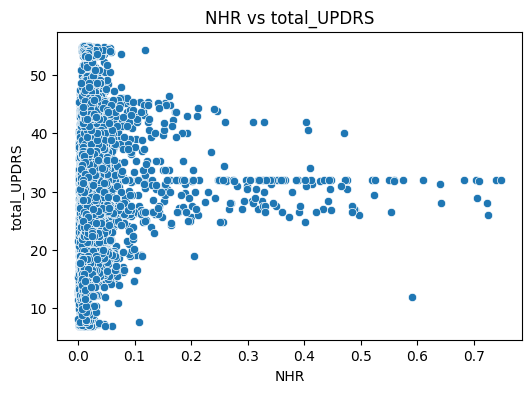

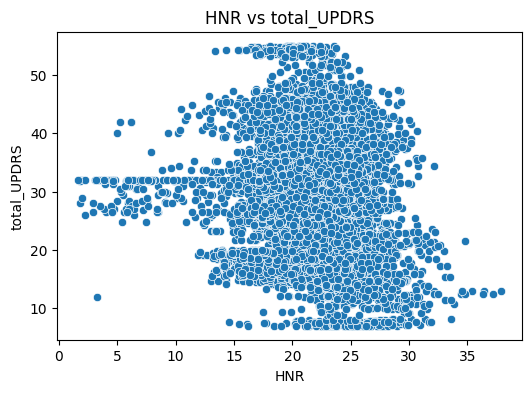

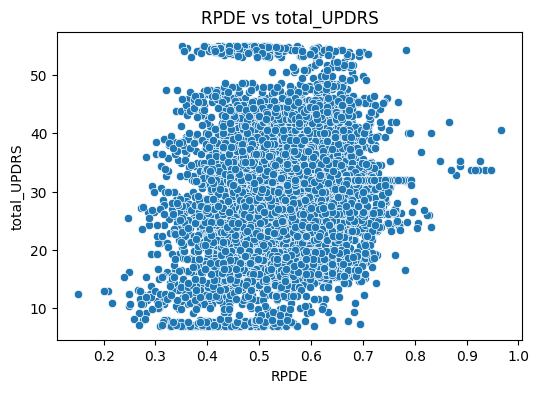

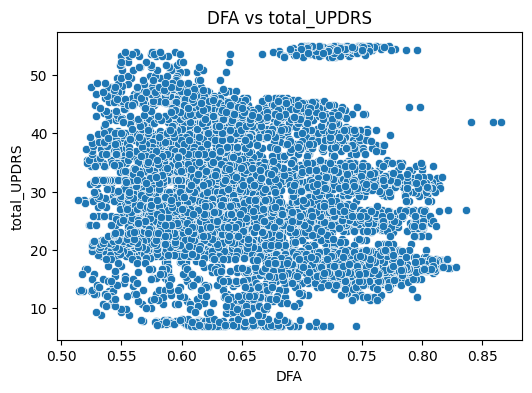

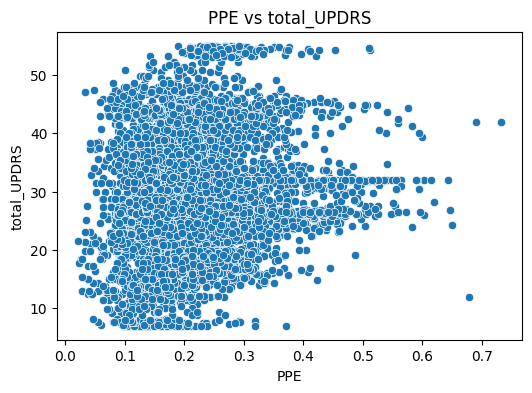

In [ ]:
for col in df.select_dtypes(include=["number"]).columns:
    if col not in ["subject#", "motor_UPDRS", target]:  # skip ID and motor_UPDRS if total_UPDRS is target
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.show()

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=["total_UPDRS", "subject#"])  # remove target & ID columns
y = df["total_UPDRS"]

In [ ]:
# Split into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (4700, 20)
Test set shape: (1175, 20)


In [ ]:
# Initialize and train the model
mymodel = LinearRegression()
mymodel.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the model
# calculate coefficients
coef_dict = dict(zip(X_train.columns, mymodel.coef_))
print(coef_dict)

{'age': np.float64(0.06467167169272547), 'sex': np.float64(-1.4097111411791794), 'test_time': np.float64(0.0024720513531388535), 'motor_UPDRS': np.float64(1.2269398317229854), 'Jitter(%)': np.float64(-264.8393903620337), 'Jitter(Abs)': np.float64(15085.376868949626), 'Jitter:RAP': np.float64(7250.7576020806855), 'Jitter:PPQ5': np.float64(-23.753582918863806), 'Jitter:DDP': np.float64(-2282.368551273139), 'Shimmer': np.float64(-16.310144155255777), 'Shimmer(dB)': np.float64(-1.1082795821773743), 'Shimmer:APQ3': np.float64(8512.877324411966), 'Shimmer:APQ5': np.float64(93.68026411761885), 'Shimmer:APQ11': np.float64(-44.23956619645381), 'Shimmer:DDA': np.float64(-2847.263723158523), 'NHR': np.float64(-1.0751166539284207), 'HNR': np.float64(-0.09451483190182941), 'RPDE': np.float64(3.3471527736863766), 'DFA': np.float64(-2.254096364141147), 'PPE': np.float64(-4.001581824470514)}


In [ ]:
# calculate intercept
print("Intercept (b₀):", mymodel.intercept_)

Intercept (b₀): 2.1129730522661525


In [ ]:
# R² score
print("R² Score:", mymodel.score(X_test, y_test))

R² Score: 0.9099723138562495


In [ ]:
# Make predictions
y_pred = mymodel.predict(X_test)
print("First 10 predictions:", y_pred[:10])

First 10 predictions: [44.47042047  8.74617384 16.22319871 18.8971657  33.28163163 24.98426007
 17.5535655  35.60287871 25.30488801 35.5598683 ]


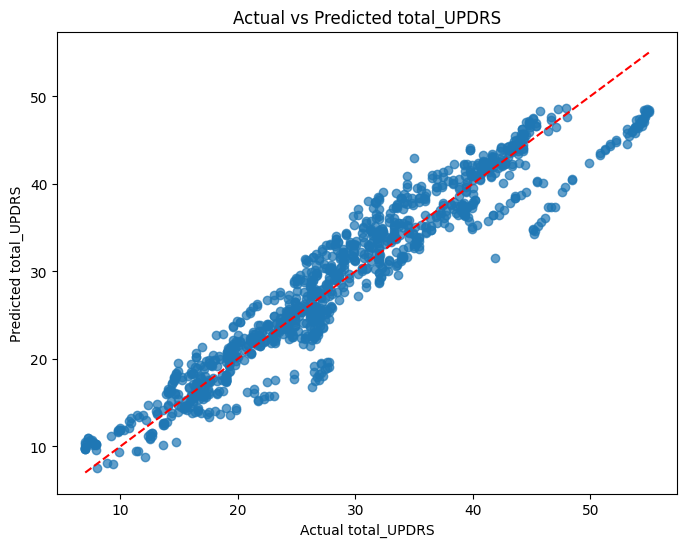

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual total_UPDRS")
plt.ylabel("Predicted total_UPDRS")
plt.title("Actual vs Predicted total_UPDRS")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.show()

In [ ]:
# Residuals plot
residuals = y_test - y_pred

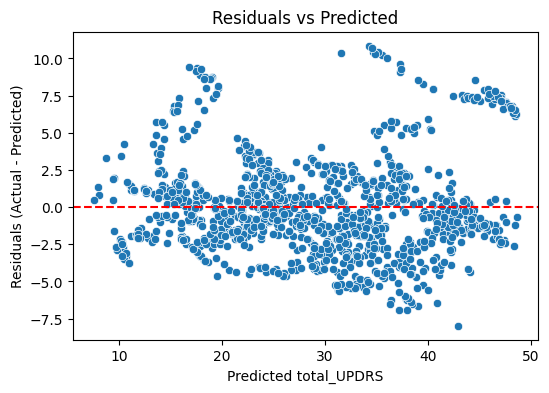

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted total_UPDRS")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.show()

In [ ]:
# so its clear multiple regression doesnt work well here because of multicollinearity.
# We can try other models like decision trees, random forests, or boosting methods to improve performance.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Train the Random Forest model
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

In [ ]:
print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R²: {r2:.3f}")

Random Forest MSE: 0.15
Random Forest R²: 0.999


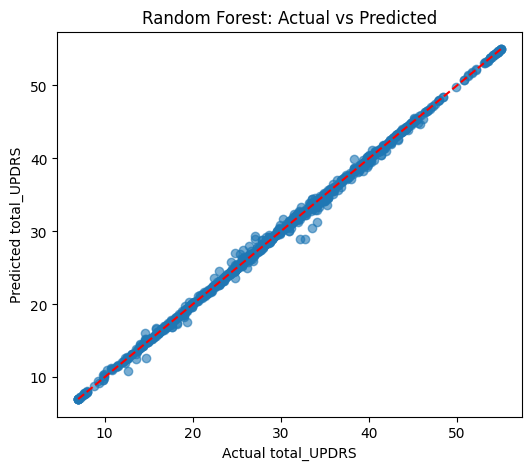

In [ ]:
# Plot actual vs predicted for Random Forest
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual total_UPDRS")
plt.ylabel("Predicted total_UPDRS")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

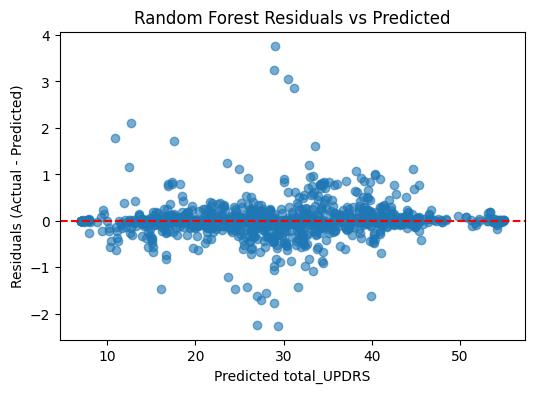

In [ ]:
# Residuals plot for Random Forest
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(6,4))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted total_UPDRS")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Random Forest Residuals vs Predicted")
plt.show()

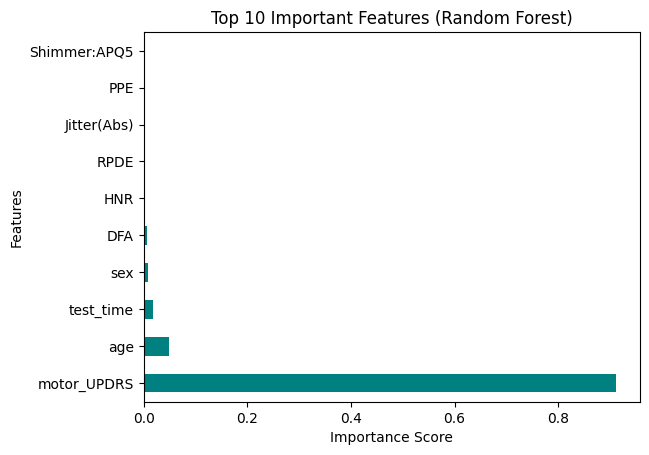

In [ ]:
# Feature importance from Random Forest
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind="barh", color='teal')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [ ]:
# Compare with Linear Regression R²
r2_lr = mymodel.score(X_test, y_test)
print(f"Linear Regression R²: {r2_lr:.3f}")
print(f"Random Forest R²: {r2:.3f}")

Linear Regression R²: 0.910
Random Forest R²: 0.999


Random Forest clearly outperforms Linear Regression here, likely due to its ability to handle non-linear relationships and interactions between features.

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
#--- Train/Val/Test split ----------
# You already have X_train, X_test, y_train, y_test from your notebook.
# We'll create a validation set from X_train to monitor training.

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.20, random_state=42
)

In [ ]:
# ----Scale features ----------
scaler = StandardScaler()
X_tr_s  = scaler.fit_transform(X_tr)
X_val_s = scaler.transform(X_val)
X_te_s  = scaler.transform(X_test)

In [ ]:
#--- Converting y to numpy arrays----
y_tr_np  = y_tr.values.reshape(-1, 1)
y_val_np = y_val.values.reshape(-1, 1)
y_te_np  = y_test.values.reshape(-1, 1)

In [ ]:
# --- Torch datasets/loaders ----------
X_tr_t  = torch.tensor(X_tr_s, dtype=torch.float32)
y_tr_t  = torch.tensor(y_tr_np, dtype=torch.float32)
X_val_t = torch.tensor(X_val_s, dtype=torch.float32)
y_val_t = torch.tensor(y_val_np, dtype=torch.float32)
X_te_t  = torch.tensor(X_te_s, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_tr_t, y_tr_t), batch_size=64, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=64, shuffle=False)

In [ ]:
# ----- Defining MLP model ----------
class ParkinsonMLP(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_features, 64),
            nn.ReLU(),
            nn.Dropout(0.20),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.20),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

model = ParkinsonMLP(n_features=X_tr_t.shape[1])

In [ ]:
# --------Train with early stopping ----------
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
loss_fn = nn.MSELoss()

best_val_loss = float("inf")
best_state = None
patience = 20
no_improve = 0

train_losses, val_losses = [], []

In [ ]:
for epoch in range(300):
    # Train
    model.train()
    train_loss_epoch = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        train_loss_epoch += loss.item() * xb.size(0)
    train_loss_epoch /= len(train_loader.dataset)

In [ ]:
# Early stopping

best_val_loss = float("inf")
best_state = None
no_improve = 0
patience = 20

train_losses = []
val_losses = []

for epoch in range(300):

    # -------- Train --------
    model.train()
    train_loss_epoch = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = loss_fn(preds, yb)
        loss.backward()
        optimizer.step()
        train_loss_epoch += loss.item() * xb.size(0)

    train_loss_epoch /= len(train_loader.dataset)

    # -------- Validate --------
    model.eval()
    val_loss_epoch = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            preds = model(xb)
            loss = loss_fn(preds, yb)
            val_loss_epoch += loss.item() * xb.size(0)

    val_loss_epoch /= len(val_loader.dataset)

    train_losses.append(train_loss_epoch)
    val_losses.append(val_loss_epoch)

    # -------- Early stopping logic --------
    if val_loss_epoch < best_val_loss - 1e-6:
        best_val_loss = val_loss_epoch
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        no_improve = 0
    else:
        no_improve += 1

    # -------- Logging --------
    if (epoch + 1) % 25 == 0:
        print(
            f"Epoch {epoch+1:03d} | "
            f"Train MSE: {train_loss_epoch:.6f} | "
            f"Val MSE: {val_loss_epoch:.6f}"
        )

    # -------- Stop training --------
    if no_improve >= patience:
        print(
            f"Early stopping at epoch {epoch+1}. "
            f"Best Val MSE: {best_val_loss:.6f}"
        )
        break

# Load best model
model.load_state_dict(best_state)


Epoch 025 | Train MSE: 6.518304 | Val MSE: 2.704226
Early stopping at epoch 31. Best Val MSE: 2.536254


<All keys matched successfully>

In [ ]:
import torch

X_test_s = scaler.transform(X_test)  # IMPORTANT: use the same scaler fitted on training
X_te_t = torch.tensor(X_test_s, dtype=torch.float32)

In [ ]:

# Evaluating Neural Net (MLP)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model.eval()
with torch.no_grad():
    y_pred_nn = model(X_te_t).cpu().numpy().reshape(-1)

y_true = y_test.values  # pandas series -> numpy

nn_mae = mean_absolute_error(y_true, y_pred_nn)
nn_rmse = np.sqrt(mean_squared_error(y_true, y_pred_nn))
nn_r2 = r2_score(y_true, y_pred_nn)

print("\n=== Neural Network (MLP) Test Metrics ===")
print(f"MAE : {nn_mae:.4f}")
print(f"RMSE: {nn_rmse:.4f}")
print(f"R²  : {nn_r2:.4f}")



=== Neural Network (MLP) Test Metrics ===
MAE : 1.1464
RMSE: 1.5384
R²  : 0.9786


In [ ]:

# Comparing with Linear + RF


import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Linear Regression metrics (y_pred must exist)
lr_mae  = mean_absolute_error(y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lr_r2   = r2_score(y_test, y_pred)

# Random Forest metrics (y_pred_rf must exist)
rf_mae  = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2   = r2_score(y_test, y_pred_rf)

comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Neural Net (MLP)"],
    "MAE":  [lr_mae, rf_mae, nn_mae],
    "RMSE": [lr_rmse, rf_rmse, nn_rmse],
    "R²":   [lr_r2,  rf_r2,  nn_r2]
}).sort_values("RMSE")

print("\n=== MODEL COMPARISON (lower RMSE is better) ===")
display(comparison_df)  # Colab display



=== MODEL COMPARISON (lower RMSE is better) ===


,Model,MAE,RMSE,R²
1,Random Forest,0.192669,0.382983,0.998676
2,Neural Net (MLP),1.146447,1.538420,0.978642
0,Linear Regression,2.361985,3.158519,0.909972


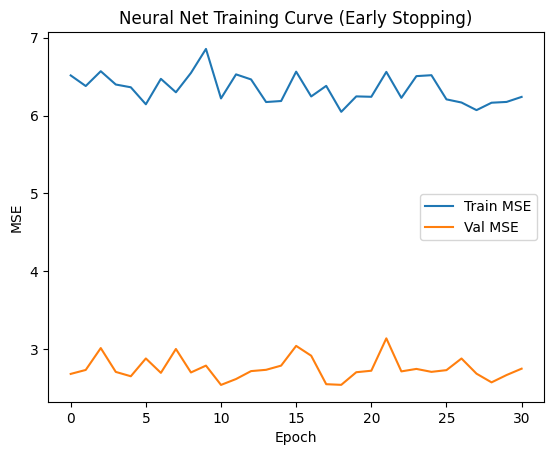

In [ ]:
#Plot learning curves
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_losses, label="Train MSE")
plt.plot(val_losses, label="Val MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Neural Net Training Curve (Early Stopping)")
plt.legend()
plt.show()


Tree-based models achieved the strongest predictive performance on structured speech biomarker data, while the neural network demonstrated stable learning behavior with early stopping. Learning curves indicate controlled generalization without severe overfitting. These results highlight trade-offs between interpretability, predictive accuracy, and model complexity in AI-assisted clinical decision support.